------------

### `The Target is (medina_house_value), and Evaluation Metric is (RMSE)`
`Read Carefully all my Markdowns and Comments`

-----

### `Import the main Libraries`

In [3]:
## Major Libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import os , joblib, missingno


## sklearn -- Preprocessing & Tuning & Transformation
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler , minmax_scale , LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn_features.transformers import DataFrameSelector
## sklearn -- metrics
from sklearn.metrics import mean_squared_error

## sklearn -- Models
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor


## Xgboost
from xgboost import XGBRegressor


### `Load the Dataset and Look at the big Picture`

In [4]:
## Read the CSV file using pandas
path = os.path.join(os.getcwd(), 'housing.csv')
df_housing = pd.read_csv(path)

## Show the Head of the DF
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
## Check some info about the Dataset to (see nulls and DataTypes)
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
## Show some statistics about the Dataset
df_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
## Check the nulls

df_housing.isna().sum()

 ## axis=0 -- by defualt

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

<Axes: >

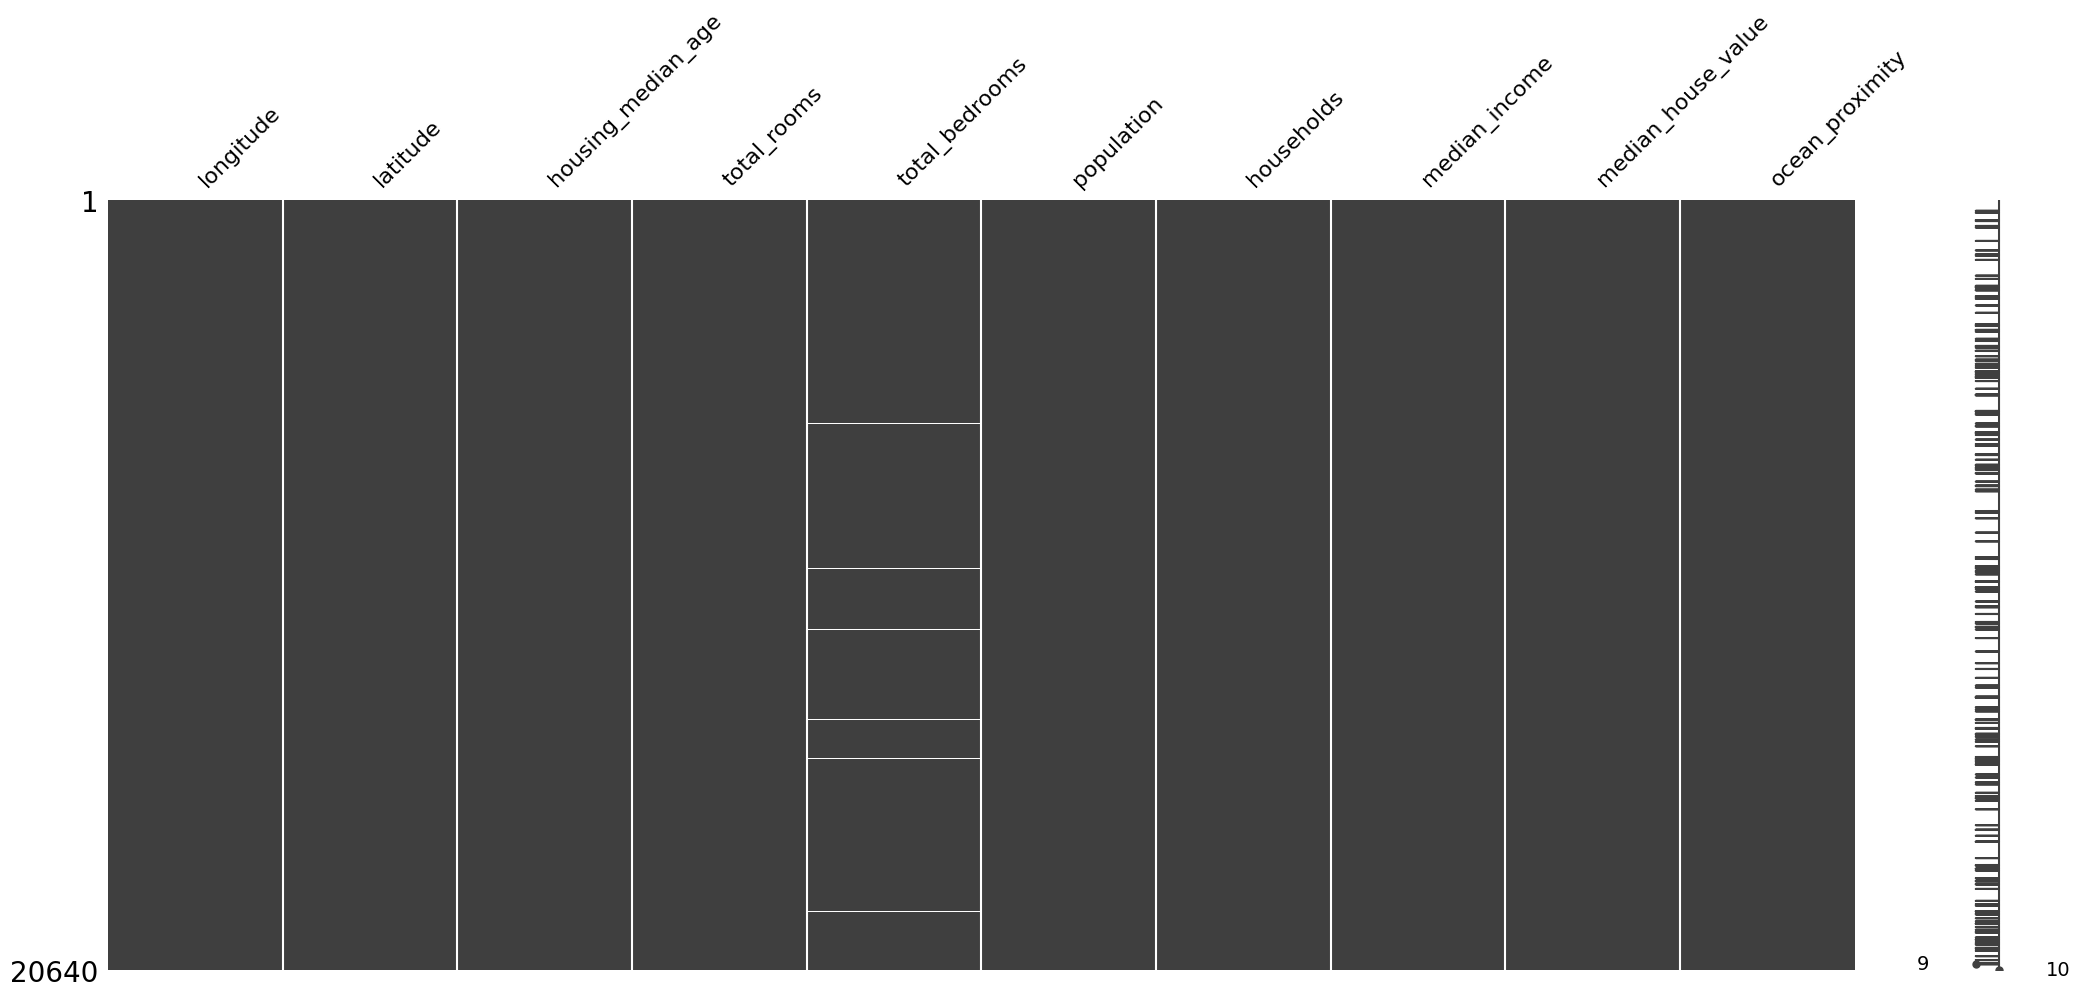

In [8]:
## check nulls using (missingno) library -- take care of the sum of above each bar
missingno.matrix(df_housing)



* > `Comment: It seems that Dataset is a contains 20640 instances and only 207 null values in total_bedrooms feature, and also all datatypes is float64 as they are continuous numerical features except the (ocean_proximity) column which is nominal categorical Feature` 

----------------

### `Exploratory Data Analysis`

### `Univariate Visualization`

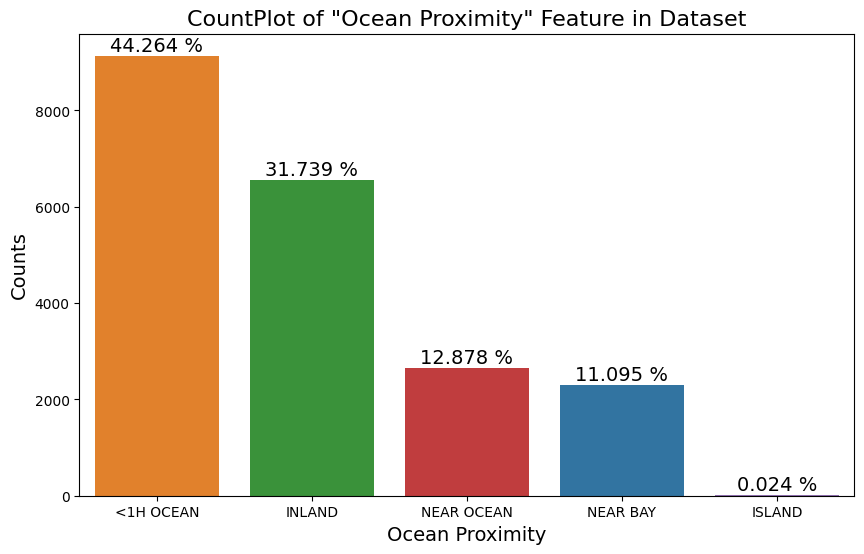

In [9]:
### Check the Distribution of (ocean_proximity) Feature in Dataset
ocean_labels = df_housing['ocean_proximity'].unique()
replicates = df_housing['ocean_proximity'].value_counts()
replicates.index
    

## Plotting
plt.figure(figsize= (10, 6))
sns.countplot(x='ocean_proximity', data=df_housing, hue='ocean_proximity', order=replicates.index)
plt.title('CountPlot of "Ocean Proximity" Feature in Dataset', fontsize=16, c= 'k')
plt.xlabel('Ocean Proximity', fontsize=14, c='k')
plt.ylabel('Counts', fontsize=14, c='k')
## To show the percentage of each bar
for i in range (len(replicates)):
    each_count = replicates.values[i]
    each_text = f'{each_count*100/len(df_housing):.3f} %'
    plt.text(x=i, y=each_count+100 , s=each_text, ha='center', c='k', fontsize=14)



In [10]:
## Replace the  (<1H OCEAN) to (1H OCEAN) -- will cause ane errors in Deploymnet
df_housing['ocean_proximity'] = df_housing['ocean_proximity'].replace('<1H OCEAN', '1H OCEAN')
df_housing['ocean_proximity'].unique()


array(['NEAR BAY', '1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

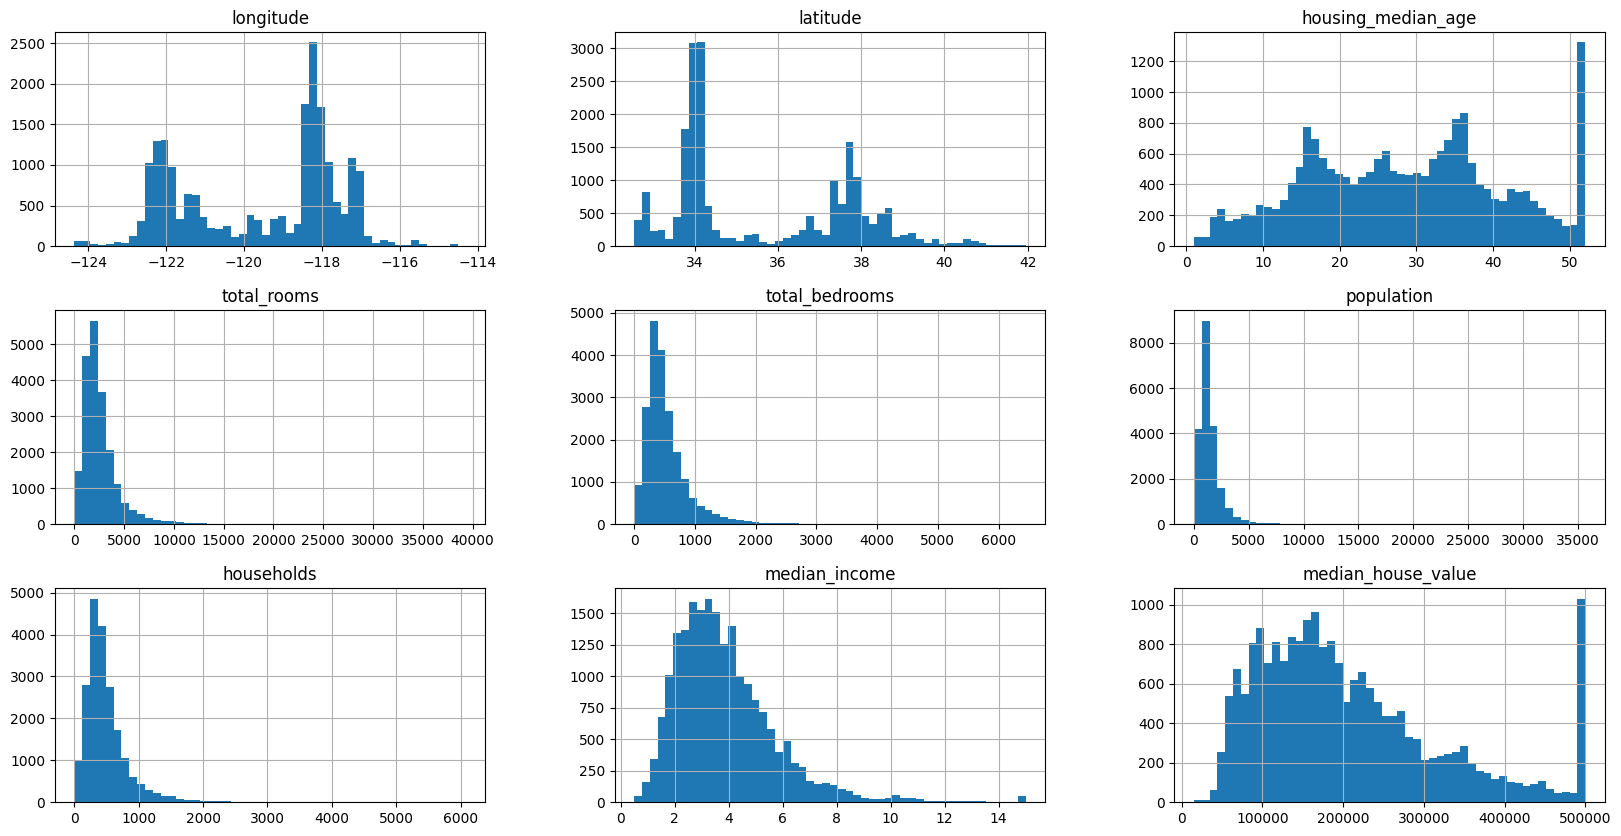

In [11]:
## Histogram Distr. of Numerical Features in Dataset
df_housing.hist(bins=50, figsize=(20,10))
plt.show()


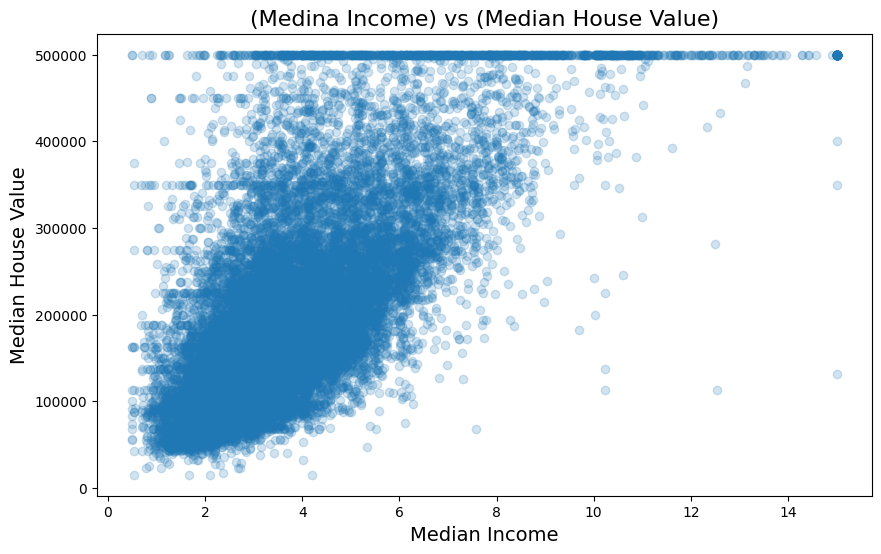

In [12]:
## Scatterplot with important Feature (medina_income) with the target (median_house_value)
plt.figure(figsize=(10, 6))
plt.scatter(x= df_housing['median_income'], y=df_housing['median_house_value'], alpha=0.2)
plt.title('(Medina Income) vs (Median House Value)', fontsize=16, c= 'k')
plt.xlabel('Median Income', fontsize=14, c='k')
plt.ylabel('Median House Value', fontsize=14, c='k')
## To show the percentage of each bar
plt.show()

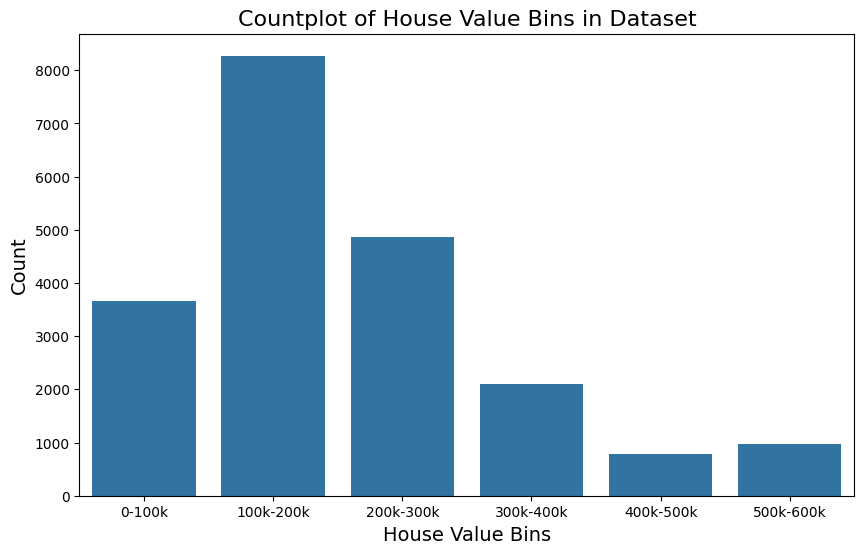

In [13]:
## Try for (median_house_value) to convert it into chunks (bins)
## Cut this Numerical Feature to Categorical One 
## Ex: for the following example -- any value between range (0-100k) will be the same category (like histogram)
plt.figure(figsize= (10, 6))
house_values_bins = pd.cut(x=df_housing['median_house_value'], bins=[0,100000, 200000, 300000, 400000, 500000, 600000], labels=['0-100k','100k-200k','200k-300k','300k-400k','400k-500k','500k-600k'])
sns.countplot(x=house_values_bins )
plt.title('Countplot of House Value Bins in Dataset', fontsize=16, c= 'k')
plt.xlabel('House Value Bins', fontsize=14, c='k')
plt.ylabel('Count', fontsize=14, c='k')
plt.show()
## Countplot for the above chunks

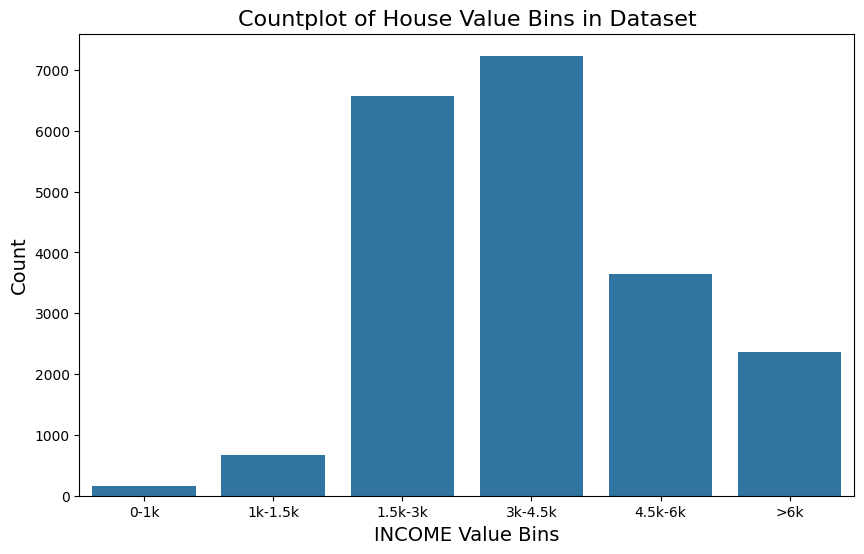

In [14]:
## Let's try the same above code for (median_income), I think it is very important Feature

plt.figure(figsize= (10, 6))
icome_values_bins = pd.cut(x=df_housing['median_income'], bins=[-np.inf,1, 1.5, 3, 4.5, 6, np.inf], labels=['0-1k','1k-1.5k','1.5k-3k','3k-4.5k','4.5k-6k','>6k'])
sns.countplot(x=icome_values_bins )
plt.title('Countplot of House Value Bins in Dataset', fontsize=16, c= 'k')
plt.xlabel('INCOME Value Bins', fontsize=14, c='k')
plt.ylabel('Count', fontsize=14, c='k')
plt.show()
## Countplot for the above chunks

* > `Comment: It seems that the (<1H ocean) is about the half of the dataset the data is biased to this category, someone can think to split the data according to this column using (startified) method if we found that this column is very important, we will discuss that later, Also, it seems that the Distribution of most of features are right skewed (exponential distribution) and it is known that the best distribution to be passed to the model is Normal Distribution, we will go further with these features to know how to deal with these skewed distrbution later, Also the majority of house_value is between (100k-200k), Also the majority of median_income is between (3-4.5), someone can change his mind and split the dataset using (startified) method according to the most important feature as I think till now which is (median_income) but use (income_bins) as the stratified method requires categorical features not numerical` 

### `Bivariate Visualization`

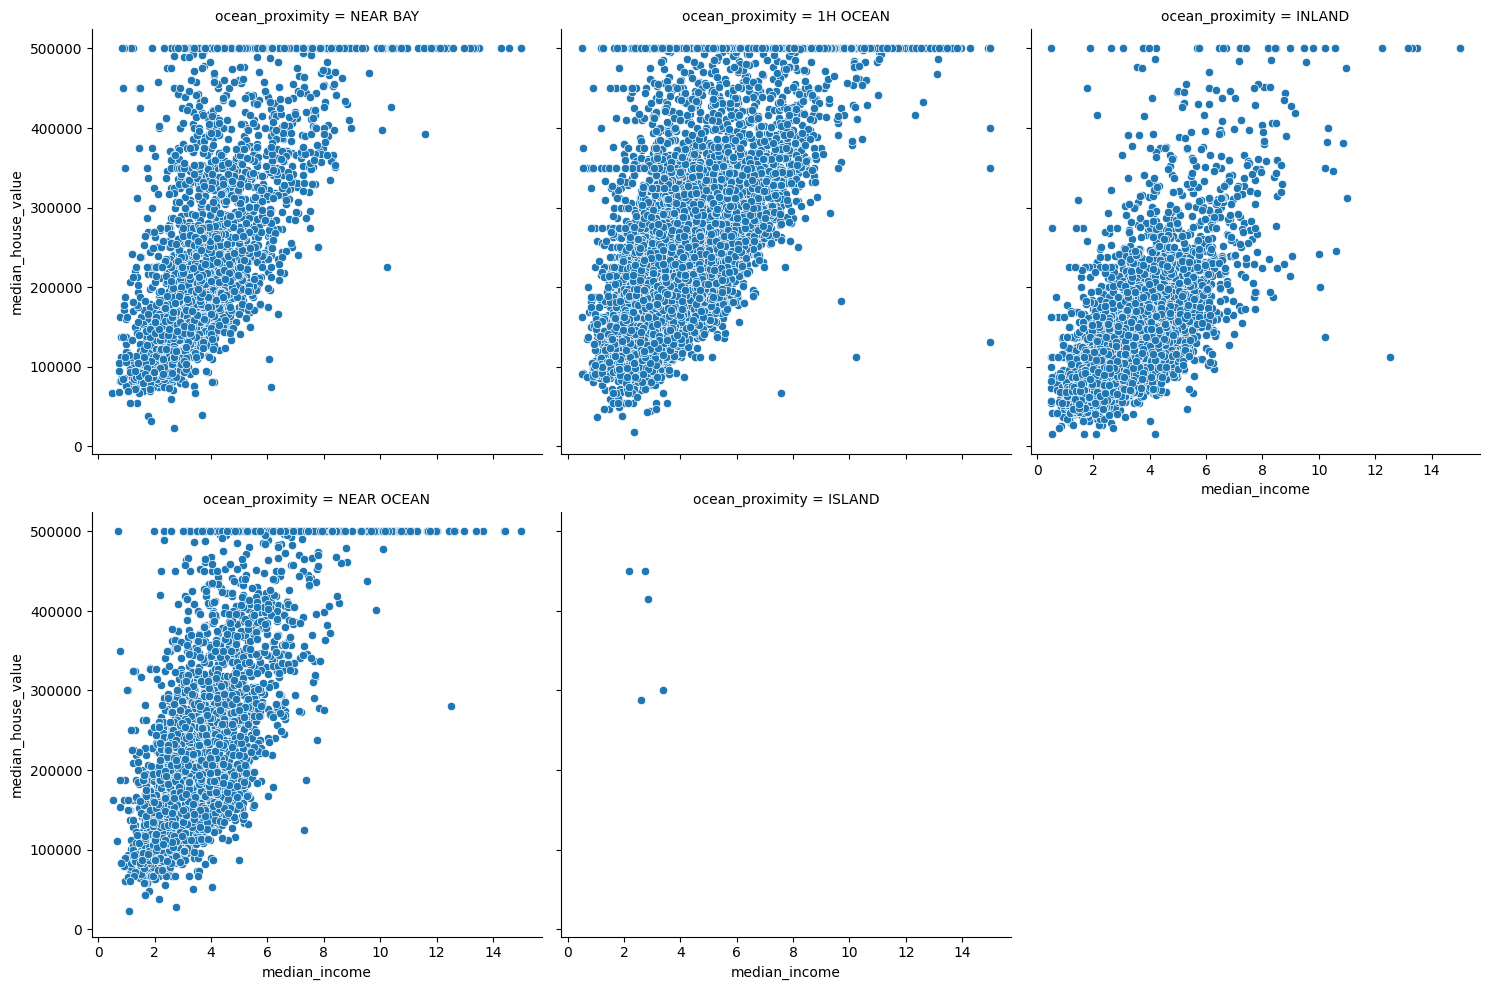

In [15]:
## Scatterplot with (median_income) & (median_house_value) at each (ocean_proximity)
sns.relplot(x='median_income',y= 'median_house_value', data=df_housing, col='ocean_proximity',col_wrap=3 )
plt.show()

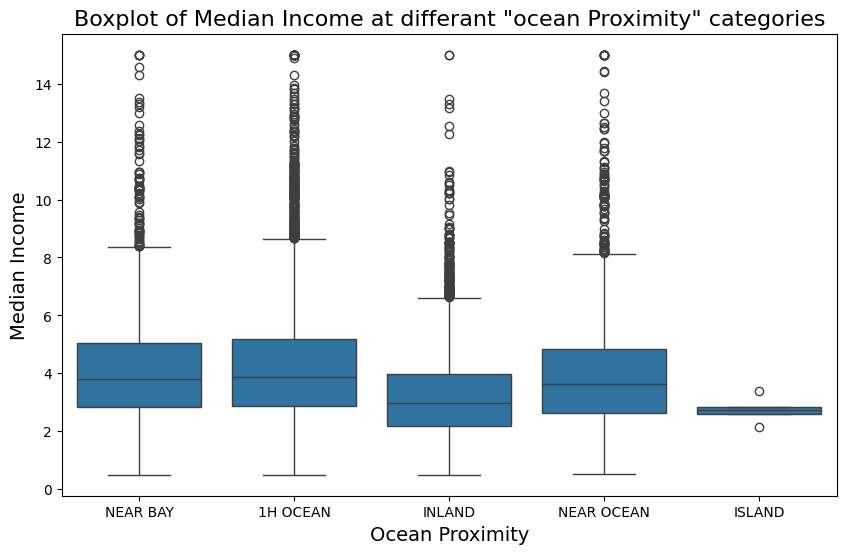

In [16]:
## Check the BoxPlot of the (median_income) at different Categories of (ocean_proximity)

plt.figure(figsize=(10,6))
sns.boxplot(data=df_housing, x='ocean_proximity', y='median_income')
plt.title('Boxplot of Median Income at differant "ocean Proximity" categories', fontsize=16, c= 'k')
plt.xlabel('Ocean Proximity', fontsize=14, c='k')
plt.ylabel('Median Income', fontsize=14, c='k')
plt.show()

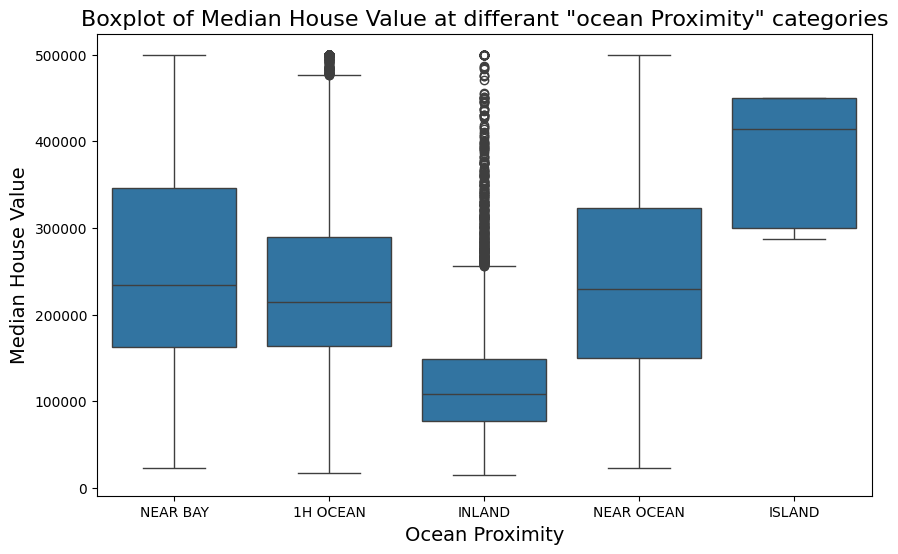

In [17]:
## Check the BoxPlot for (median_house_value) at different Categories of (ocean_proximity)
plt.figure(figsize=(10,6))
sns.boxplot(data=df_housing, x='ocean_proximity', y='median_house_value')
plt.title('Boxplot of Median House Value at differant "ocean Proximity" categories', fontsize=16, c= 'k')
plt.xlabel('Ocean Proximity', fontsize=14, c='k')
plt.ylabel('Median House Value', fontsize=14, c='k')
plt.show()

* > `Comment: It seems that the Distribution of median_income is almost the same at ocean_proximity categories, Also, it seems that the INLAND median_income and median_house value is less than other categories and it makes sense ` 

### `Multivariate Visualization`

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


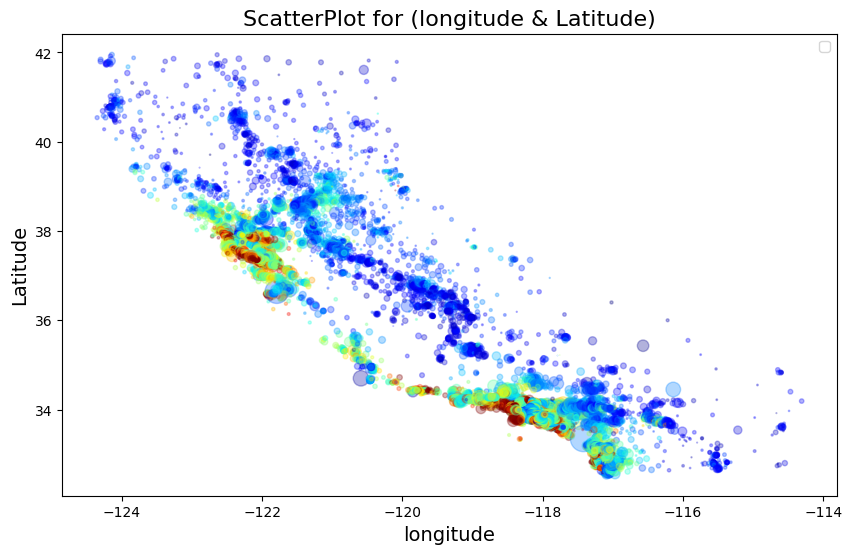

In [18]:
## ScatterPlot for (longitude & Latitude), and add (population) as size of point, and the color as (median_house_value)

plt.figure(figsize=(10,6))
plt.scatter(x=df_housing['longitude'],
            y=df_housing['latitude'],
            alpha=0.3,
            s=df_housing['population']/100,
            c=df_housing['median_house_value'],
            cmap=plt.get_cmap('jet') )
plt.title('ScatterPlot for (longitude & Latitude)', fontsize=16, c= 'k')
plt.xlabel('longitude', fontsize=14, c='k')
plt.ylabel('Latitude', fontsize=14, c='k')
plt.legend()
plt.show()

* > `Comment: It seems that prices is higher near the ocean than other zones, and also these araes have higher population` 

---------

### `Check the Correlation between the Features and Target`

In [19]:
## Using pearson correlation
df_housing_num = df_housing.drop(['ocean_proximity'], axis=1)
df_housing_num.corr()
df_housing_num.corr()['median_house_value'].sort_values(ascending=False)


median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

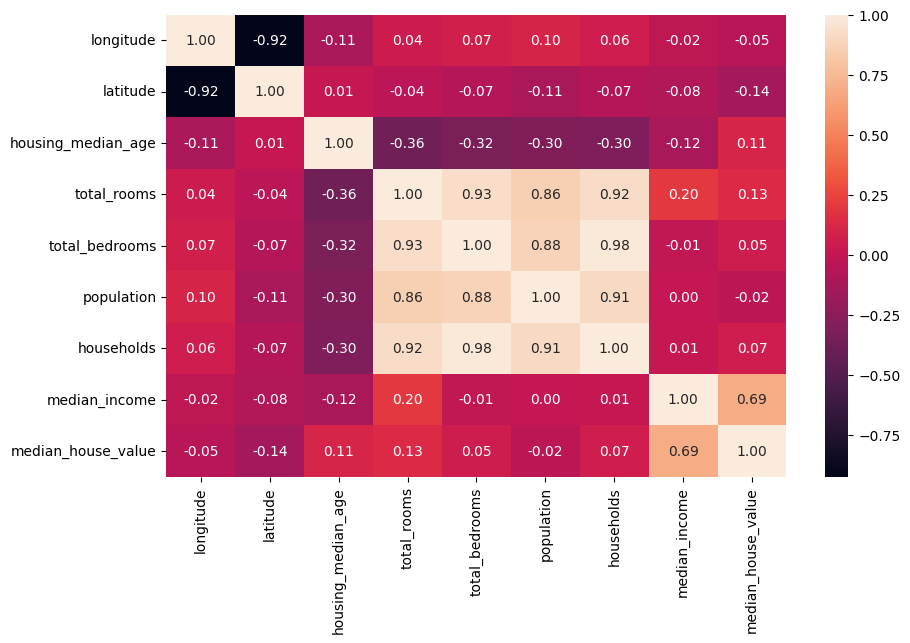

In [20]:
## you can show this as heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df_housing_num.corr(),annot=True, fmt='.2f')
plt.show()

* > `Comment: It seems that the most correlated Feature with target is (median_income) as I predict that, and feature like (households & population) are less correlated` 

### `Feature Engineering`
``Try to add some features, thinking that it will be more useful and more correlated to the target``

In [21]:
## Try to make some Feature Engineering --> Feature Extraction --> Add the new column to the main DF
df_housing['rooms_per_household'] = df_housing['total_rooms'] / df_housing['households']
df_housing['bedrooms_per_rooms'] = df_housing['total_bedrooms'] / df_housing['total_rooms']


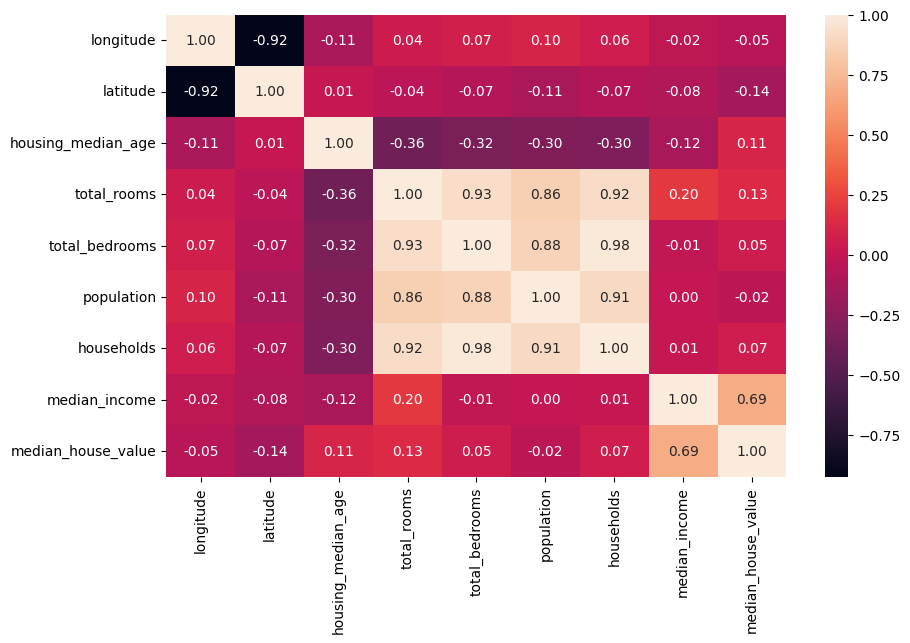

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [22]:
## check the correlation again

plt.figure(figsize=(10,6))
sns.heatmap(df_housing_num.corr(),annot=True, fmt='.2f')
plt.show()
df_housing_num.corr()['median_house_value'].sort_values(ascending=False)


## some progress for out new features (very good)

In [23]:
from sklearn import utils
utils.shuffle(df_housing, random_state=53)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_rooms
15959,-122.43,37.71,35.0,2878.0,564.0,1633.0,528.0,4.5000,266900.0,NEAR BAY,5.450758,0.195969
16523,-121.20,37.80,28.0,3264.0,576.0,1512.0,567.0,3.7546,135300.0,INLAND,5.756614,0.176471
15394,-117.14,33.23,11.0,4068.0,829.0,918.0,500.0,3.1272,281300.0,1H OCEAN,8.136000,0.203786
19243,-122.79,38.50,18.0,4839.0,918.0,2755.0,841.0,3.7500,248300.0,1H OCEAN,5.753864,0.189709
17102,-122.22,37.46,37.0,2586.0,495.0,1208.0,502.0,4.3214,342700.0,NEAR OCEAN,5.151394,0.191415
...,...,...,...,...,...,...,...,...,...,...,...,...
4596,-118.28,34.05,41.0,1788.0,774.0,2931.0,702.0,1.4413,158900.0,1H OCEAN,2.547009,0.432886
8854,-118.41,34.07,52.0,1202.0,142.0,408.0,138.0,15.0001,500001.0,1H OCEAN,8.710145,0.118136
19645,-120.72,37.54,17.0,729.0,134.0,431.0,121.0,4.2188,131300.0,INLAND,6.024793,0.183813
14075,-117.12,32.76,28.0,1605.0,501.0,936.0,460.0,2.5991,147500.0,NEAR OCEAN,3.489130,0.312150


* > `Comment:Some progress for out new features (very good), Strong correlation` 

### `Split the Dataset`
``I will split the Dataset using ordinary method (random method) not (Stratified method)``

In [24]:
## Split the whole Dataset to Feature & Target

X= df_housing.drop(columns=['median_house_value'], axis=1) ## Features
y = df_housing['median_house_value']              ## target

In [25]:
## Random split the dataset to two sets (train_set, test_set)
## For validation ---  I will use Cross Validation
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.15, random_state=53)

## Check Shapes of these Sets
print('X_train shape', X_train.shape)
print('X_test shape', X_test.shape)
print('y_train shape', y_train.shape)
print('y_test shape', y_test.shape)


X_train shape (17544, 11)
X_test shape (3096, 11)
y_train shape (17544,)
y_test shape (3096,)


* `Notes in sklearn, Read Crarefully:` <br />
    * `.fit --> means that the instance you created is trying to learn or train`
    * `.transform --> means that the instance you created has learned and now time to apply what it learned by trasnforming`
    * `.fit_transform --> means the two above steps in one step, and don't use this method except with training data`
    * `We fit to train the data, and after it learns we transform (train, valid, test)`
    * `In other meaning --> (.fit) then (.transform) to training data or (fit_transform) in one step`
    * `In other meaning --> only (.transform) to other data after learing to training data`

### `Dealing with nulls`

In [26]:
## Separete the columns according to type (numerical or categorical)
num_cols = [col for col in X_train.columns if X_train[col].dtype in ['float64']]
catg_cols = [col for col in X_train.columns if X_train[col].dtype not in ['float64']]

In [27]:
## What about imputing the null using (median) ---> Using SimpleImputer
imputer = SimpleImputer()                  ## Intialization
imputer.fit(X_train[num_cols])                   ## learn

## Transform
X_train_filled = imputer.transform(X_train[num_cols]) 
X_test_filled = imputer.transform(X_test[num_cols])

pd.DataFrame(X_train_filled).isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64

### `Get all Together`
* `Now we have outputs from Numerical Pipeline and Cateforical Pipeline`
* `We have two solutions:`
    * `Conactenate the Features (Numerical after processing) and (Encoded Categorical)`
    * `You can use (FeatureUnion or ColumnTransformer) provided in sklearn`

In [32]:
## We can get much much easier like the following
## numerical pipeline
num_pipeline = Pipeline(steps=[
                                ('selector', DataFrameSelector(num_cols)),
                                ('imputer', SimpleImputer(strategy='median')),
                                ('scaler', StandardScaler())
])

## categorical pipeline
cat_pipeline = Pipeline(steps=[
                                ('selector', DataFrameSelector(catg_cols)),
                                ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                                ('one', OneHotEncoder(sparse_output=False))
])

## concatenate both two pipelines
total_pipeline = FeatureUnion(transformer_list=[
                                                ('num', num_pipeline),
                                                ('categ', cat_pipeline)
])

                            
## deal with (total_pipeline) as an instance -- fit and transform to train dataset and transform only to other datasets
X_train_final = total_pipeline.fit_transform(X_train)
X_test_final = total_pipeline.transform(X_test)
                ### Every thing is processed :D

### `Building ML Models`

`Evaluation Metric: RMSE`

### `1. LinearRegression`

In [33]:
## LinearRegression -- Regression using Ordinary Least Squares (OLS) Method
lin_reg = LinearRegression()
lin_reg.fit(X_train_final,y_train)
lin_reg.coef_  ## for thetas 1,2,3,4,------, n 
lin_reg.intercept_   #  theta 0

## define the model
y_pred = lin_reg.predict(X_train_final)                                                         ## train

In [37]:
## Check scores of this Model (RMSE) using (cross_val_score)
mse_scores_lin = cross_val_score(estimator=lin_reg, X=X_train_final, y=y_train,
                                 cv=5, n_jobs=1, scoring='neg_mean_squared_error')       ## sklearn deals with error as negative
mse_scores_lin = -1 * mse_scores_lin     ## we want it positive
rmse_scores_lin = np.sqrt(mse_scores_lin)
print(rmse_scores_lin.mean())
                                                        

## Get Prediction using (cross_val_predict)
y_pred_cv_linreg = cross_val_predict(estimator=lin_reg, X=X_train_final, y=y_train,
                                 cv=5, n_jobs=1, method='predict') 

## You can check the (RMSE) using what model predicts and compare it with the Mean of above result -- almost the same
## take care of this point --> don't use .predict when you are using (crossValidation)



## almost the same result :D

68107.5279694928


### `2. SGDRegressor`

In [35]:
## define the model --> ## initialize some random Hyperparameter --> we will tune later

sgd_reg = SGDRegressor(penalty='l2', alpha=0.0001, shuffle=True, max_iter=10000, eta0=0.001)  ## with Regularization
sgd_reg.fit(X_train_final, y_train)  ## train the model

SGDRegressor(eta0=0.001, max_iter=10000)

In [36]:
## Check scores of this Model (RMSE) using (cross_val_score)
mse_scores_sgd = cross_val_score(estimator=sgd_reg, X=X_train_final, y=y_train,
                                 cv=5, n_jobs=1, scoring='neg_mean_squared_error')       ## sklearn deals with error as negative
mse_scores_sgd = -1 * mse_scores_sgd     ## we want it positive
rmse_scores_sgd = np.sqrt(mse_scores_sgd)
rmse_scores_sgd.mean()
                         

## Get Prediction using (cross_val_predict)
y_pred_cv_sgd = cross_val_predict(estimator=sgd_reg, X=X_train_final, y=y_train,
                                 cv=5, n_jobs=1, method='predict') 

## You can check the (RMSE) using what model predicts and compare it with the Mean of above result -- almost the same
## take care of this point --> don't use .predict when you are using (crossValidation)

                            ## almost the same result :D

68238.0381118886

### `8. KNN`

In [1]:
## Using KNN, Low n_neighbors -> Overfitting &  High n_neighbors ->  Underfitting
knn = KNeighborsRegressor()
knn.fit(X_train_final,y_train)   ## train the model

NameError: name 'KNeighborsRegressor' is not defined

In [ ]:
## Check scores of this Model (RMSE) using (cross_val_score)
mse_scores_knn = cross_val_score(estimator=knn, X=X_train_final, y=y_train,
                                 cv=5, n_jobs=1, scoring='neg_mean_squared_error')       ## sklearn deals with error as negative
mse_scores_knn= -1 * mse_scores_knn## we want it positive
rmse_scores_knn= np.sqrt(mse_scores_knn)
print(rmse_scores_knn.mean())
                      

## Get Prediction using (cross_val_predict)  
y_pred_knn = cross_val_predict(estimator=knn, X=X_train_final, y=y_train,
                                 cv=5, n_jobs=1, method='predict')

## You can check the (RMSE) using what model predicts and compare it with the Mean of above result -- almost the same
## take care of this point --> don't use .predict when you are using (crossValidation)

rmse_knn = np.sqrt(mean_squared_error(y_train, y_pred_knn))        
print('------'*40)
print(rmse_knn.mean())  

                ## almost the same result :D

### `7. RandomForest`

In [38]:
## Using RF ---> A lot of Hyperparams but the Dominant (n_estimators, max_depth)
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=150, max_depth=6, random_state=53 )
rf_reg.fit(X_train_final,y_train)
## train


RandomForestRegressor(max_depth=6, n_estimators=150, random_state=53)

In [39]:
## Check scores of this Model (RMSE) using (cross_val_score)
mse_scores_rf = cross_val_score(estimator=rf_reg, X=X_train_final, y=y_train,
                                 cv=5, n_jobs=1, scoring='neg_mean_squared_error')       ## sklearn deals with error as negative
mse_scores_rf= -1 * mse_scores_rf## we want it positive
rmse_scores_rf= np.sqrt(mse_scores_rf)
print(rmse_scores_rf.mean())
                         
## Get Prediction using (cross_val_predict)
y_pred_rf = cross_val_predict(estimator=rf_reg, X=X_train_final, y=y_train,
                                 cv=5, n_jobs=1, method='predict')

## You can check the (RMSE) using what model predicts and compare it with the Mean of above result -- almost the same
## take care of this point --> don't use .predict when you are using (crossValidation)
rmse_rf = np.sqrt(mean_squared_error(y_train, y_pred_rf))        
print('------'*40)
print(rmse_rf.mean())                                                         ## almost the same result :D

array([303679.06410975, 144580.92895186, 258848.26964648, ...,
       147638.75748158, 170675.12745953,  75731.95330493])

### `RF Tuning`

In [40]:
## Using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

## Intialize
parms_best_fr = {
                    'n_estimators': np.arange(400,500,50),
                    'max_depth': np.arange(16, 20, 2),
                    'max_samples':[0.7, 0.8, 0.9, 1]
}

search_random_forest = RandomizedSearchCV(estimator=rf_reg,
                                         param_distributions=parms_best_fr,
                                         n_iter=2,
                                         random_state=53,
                                         scoring='neg_mean_squared_error',
                                         cv=5,
                                         verbose=6)

search_random_forest.fit(X_train_final, y_train)


Fitting 5 folds for each of 2 candidates, totalling 10 fits


[CV 1/5] END max_depth=16, max_samples=0.8, n_estimators=450;, score=-2666388749.758 total time= 5.3min
[CV 2/5] END max_depth=16, max_samples=0.8, n_estimators=450;, score=-2332297703.147 total time= 5.9min
[CV 3/5] END max_depth=16, max_samples=0.8, n_estimators=450;, score=-2420018978.145 total time= 6.0min
[CV 4/5] END max_depth=16, max_samples=0.8, n_estimators=450;, score=-2524161178.855 total time= 5.6min
[CV 5/5] END max_depth=16, max_samples=0.8, n_estimators=450;, score=-2628057846.407 total time= 5.6min
[CV 1/5] END max_depth=16, max_samples=1, n_estimators=450;, score=-13811951520.639 total time=   2.1s
[CV 2/5] END max_depth=16, max_samples=1, n_estimators=450;, score=-13047890186.749 total time=   1.8s
[CV 3/5] END max_depth=16, max_samples=1, n_estimators=450;, score=-12659561916.570 total time=   3.1s
[CV 4/5] END max_depth=16, max_samples=1, n_estimators=450;, score=-13650737581.403 total time=   2.1s
[CV 5/5] END max_depth=16, max_samples=1, n_estimators=450;, score=-

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_depth=6,
                                                   n_estimators=150,
                                                   random_state=53),
                   n_iter=2,
                   param_distributions={'max_depth': array([16, 18]),
                                        'max_samples': [0.7, 0.8, 0.9, 1],
                                        'n_estimators': array([400, 450])},
                   random_state=53, scoring='neg_mean_squared_error',
                   verbose=6)

In [41]:
## Get the best Params
search_random_forest.best_params_


## Get the best estimator
best_forest = search_random_forest.best_estimator_

In [ ]:

## Get Prediction using (cross_val_predict)
y_pred_best_rf = cross_val_predict(best_forest, X_train_final, y_train, cv=5, method='predict', verbose=6)

## You can check the (RMSE) using what model predicts and compare it with the Mean of above result -- almost the same
## take care of this point --> don't use .predict when you are using (crossValidation)
rmse_best_forest = np.sqrt(mean_squared_error(y_train, y_pred_best_rf))        
print('------'*40)
print(rmse_best_forest.mean())  

In [158]:
X.shape

(20640, 11)

In [168]:
num_cols

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_household',
 'bedrooms_per_rooms']

### `Feature Importance using RF`

In [42]:
## Getting the Features Importance (they are normalized in RF, sum=1)
feat_import_forest = {}
for name, score in zip (num_cols, best_forest.feature_importances_[:10]):
    feat_import_forest[name] = score

## Features are keys, Importance is the value
keys_forest = feat_import_forest.keys()
value_forest = feat_import_forest.values()


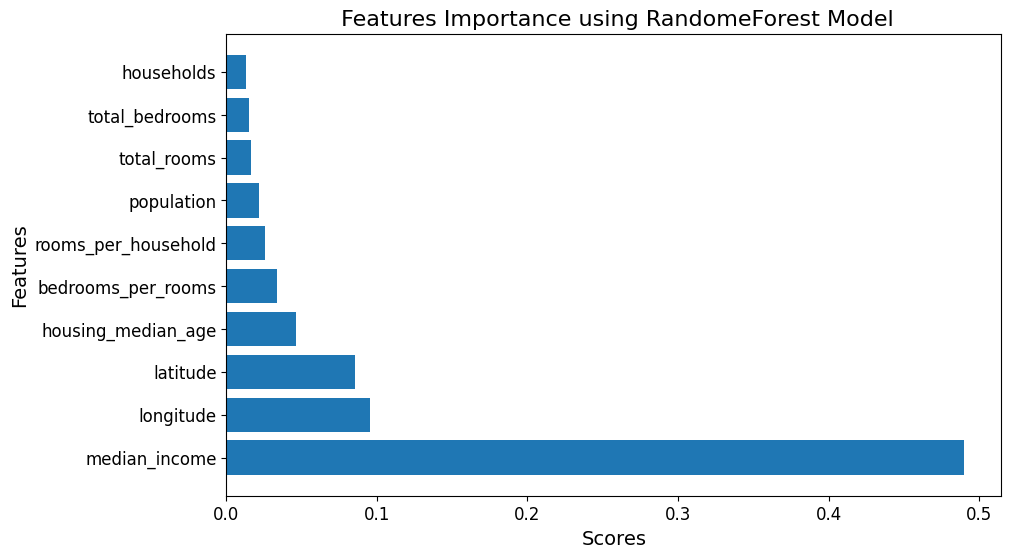

In [43]:
## to DF and then plotting
df_feat_import_forest = pd.DataFrame({'Features': keys_forest, 'Scores': value_forest}).sort_values(by='Scores', ascending=False)
df_feat_import_forest
## plotting
plt.figure(figsize=(10,6))
plt.barh(y=df_feat_import_forest['Features'], width=df_feat_import_forest['Scores'])
plt.title(' Features Importance using RandomeForest Model', fontsize=16, c= 'k')
plt.xlabel('Scores', fontsize=14, c='k')
plt.ylabel('Features', fontsize=14, c='k')
plt.xticks(c='k', fontsize=12)
plt.yticks(c='k', fontsize=12)
plt.show()


### `8. XGboost`

In [55]:
## Using the Hero API -- XGBOOST
xgb_reg = XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1, subsample=0.8)
xgb_reg.fit(X_train_final, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [45]:
## Check scores of this Model (RMSE) using (cross_val_score)
mse_scores_xgb = cross_val_score(estimator=xgb_reg, X=X_train_final, y=y_train,
                                 cv=5, n_jobs=1, scoring='neg_mean_squared_error')       ## sklearn deals with error as negative
mse_scores_xgb= -1 * mse_scores_xgb## we want it positive
rmse_scores_xgb= np.sqrt(mse_scores_xgb)
print(rmse_scores_xgb.mean())     ## sklearn deals with error as negative

## Get Prediction using (cross_val_predict)
y_pred_xgb = cross_val_predict(xgb_reg, X_train_final, y_train, cv=5, method='predict', verbose=6)

## You can check the (RMSE) using what model predicts and compare it with the Mean of above result -- almost the same
## take care of this point --> don't use .predict when you are using (crossValidation)
rmse_xgb = np.sqrt(mean_squared_error(y_train, y_pred_xgb))        
print('------'*40)
print(rmse_xgb.mean())  
 ## almost the same result :D

48059.168339370284

### `Tuning XGBoost`

In [46]:
### Let's try tuning XGBoost using GridSearchCV  --- needs alot of tuning
parms_best_xgb = { 'n_estimators': [400, 450],
                    'max_depth': np.arange(16, 20, 2),
                    'subsample':[0.8, 0.9],
                    'learning_rate':[0.1, 0.2]
                 }


## Intitalize the GridSearchCV and Fit ti Data
grid_xgb = GridSearchCV(estimator=xgb_reg, param_grid=parms_best_xgb, cv=2, scoring='neg_mean_squared_error', verbose=6, n_jobs=1)
grid_xgb.fit(X_train_final, y_train) ## train

Fitting 2 folds for each of 16 candidates, totalling 32 fits


[CV 1/2] END learning_rate=0.1, max_depth=16, n_estimators=400, subsample=0.8;, score=-2573426857.614 total time=  51.5s
[CV 2/2] END learning_rate=0.1, max_depth=16, n_estimators=400, subsample=0.8;, score=-2553185502.855 total time=  58.8s
[CV 1/2] END learning_rate=0.1, max_depth=16, n_estimators=400, subsample=0.9;, score=-2646423002.124 total time=  47.3s
[CV 2/2] END learning_rate=0.1, max_depth=16, n_estimators=400, subsample=0.9;, score=-2611740065.382 total time=  52.2s
[CV 1/2] END learning_rate=0.1, max_depth=16, n_estimators=450, subsample=0.8;, score=-2573426720.485 total time= 1.0min
[CV 2/2] END learning_rate=0.1, max_depth=16, n_estimators=450, subsample=0.8;, score=-2553185979.614 total time=  51.4s
[CV 1/2] END learning_rate=0.1, max_depth=16, n_estimators=450, subsample=0.9;, score=-2646422913.582 total time=  49.8s
[CV 2/2] END learning_rate=0.1, max_depth=16, n_estimators=450, subsample=0.9;, score=-2611739755.507 total time=  49.3s
[CV 1/2] END learning_rate=0.1, 

GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.1, ma...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=6, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=1,
             param_grid={'learning_rate': [0.1, 0.2],
                         'max_depth': array([16, 18]),
                         'n_estimators': [400, 450], 'subsample': [0.8, 0.9]},
             scoring='neg_mean_squared_error', verbose=6)

In [48]:
## Get the best Params
grid_xgb.best_params_

## Get the best estimator
best_xgb = grid_xgb.best_estimator_
best_xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=16, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=400, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [51]:
### Finally

## Check scores of this Model (RMSE) using (cross_val_score)
mse_scores_best_xgb = cross_val_score(estimator=best_xgb, X=X_train_final, y=y_train, cv=5 , scoring='neg_mean_squared_error', )
mse_scores_best_xgb = -1 * mse_scores_best_xgb
rmse_scores_best_xgb = np.sqrt(mse_scores_best_xgb)
print(rmse_scores_best_xgb.mean())
                                           ## almost the same result :D

48866.87732846175


In [53]:

## Get Prediction using (cross_val_predict)
y_pred_best_xgb = cross_val_predict(best_xgb, X_train_final, y_train, cv=5, method='predict', verbose=6)

## You can check the (RMSE) using what model predicts and compare it with the Mean of above result -- almost the same
## take care of this point --> don't use .predict when you are using (crossValidation)
rmse_best_xgb = np.sqrt(mean_squared_error(y_train, y_pred_best_xgb))        
print('------'*40)
print(rmse_best_xgb.mean())  

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
48878.42102764362


### `Download the best Model --- best_xgb`

In [54]:
## Download using joblib
joblib.dump(best_xgb, 'model_XGBoost.pkl')


['model_XGBoost.pkl']

In [59]:
## to load this pretrained Model

loaded_model = joblib.load('model_XGBoost.pkl')
loaded_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=16, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=400, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### `Inference on Test Dataset`

In [60]:
## Now, we can touch Test Dataset using (loaded_model == best_xgb) -- tuned XGBoost Model
  ## Remember X_test_final --> is processed and ready (take care
y_pred_test = loaded_model.predict(X_test_final)
## RMSE on test after finishing all my work
np.sqrt(mean_squared_error(y_test, y_pred_test))
  ## Very Good :D

48367.70776757034